# SIR Model for Simulating the Effectiveness of Proper Social Distancing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# No one is added to the susceptible group, since we are ignoring births and immigration.
# The only way an individual leaves the susceptible group is by becoming infected. 
# We assume that the time-rate of change of  S(t), the number of susceptibles,1 depends
# on the number already susceptible, the number of individuals already infected, and the
# amount of contact between susceptibles and infecteds.
# Not all these contacts are with susceptible individuals. If we assume a homogeneous
# mixing of the population, the fraction of these contacts that are with susceptibles is
# s(t). Tus, on average, each infected individual generates 
# s(t) new infected individuals per day
# No birth, immigration
# Recovery gives total immunity
# Fixed infection and recovery rate
# People are well mixed
# timesteps each day
# SOCIAL DISTANCING
# fixed number b of contacts per day that are sufficient to spread the disease aka Transmission rate
# CANNOT CHANGE THIS CONSTANT
# fixed fraction k of the infected group will recover during any given day 1/14
# constacts per infection, if greater than 1, then exponential and spreads through population
# r_0 = b/k 

# We assume:
    # n = S + I + R
    # 1 = S/n + I/n + R/n
    # 0 = dS/dt + dI/dt + dR/dt

# dS/dt = -b*S*I           ---> Si+1 - Si = -(b*S*I)dt      --->  Si+1 = Si - (b*S*I)dt
# dI/dt = b*S*I - k*I      ---> Ii+1 - Ii = (b*S*I -k*I)dt  --->  Ii+1 = Ii + (b*S*I -k*I)dt
# dR/dt = k*I              ---> Ri+1 - Ri = k*Idt           --->  Ri+1 = Ri + k*Idt 

# Finally, we complete our model by giving each differential equation an initial condition
# For this particular virus hardly anyone was immune at the beginning of the epidemic
# Almost everyone was susceptible. We will assume that there was a trace level of infection
# in the population, say, 10 people.2 Thus, our initial values for the population variables are

In [3]:
# SIR Model
def sir(s, i, r, S, I, R, b, k, simlen):
    S.append(s/(s+i))
    I.append(i/(s+i))
    R.append(r)
    # Assuming dt is 1
    for i in range(simlen):
        S_pl_one = S[i] - (b*S[i]*I[i])    
        I_pl_one = I[i] + (b*S[i]*I[i] - k*I[i])
        R_pl_one = R[i] + k*I[i]
        S.append(S_pl_one)
        I.append(I_pl_one)
        R.append(R_pl_one)

In [4]:
# return a list containing absolute values and not fractions
def makeAbsolute(l, n):
    tmp = []
    for i in range(len(l)):
        # in thousands
        tmp.append(n*l[i] / 1000)
    return tmp

In [5]:
# Add confirmed cases lists
def addConfs(I, conf, confAcc):
    for i in range(len(I)-1):        
        tmp1 = (I[i+1] - I[i]) if (I[i+1] - I[i]) >= 0 else 0 
        conf.append(tmp1)    
        tmp2 = confAcc[i] + conf[i+1]
        confAcc.append(tmp2)

## France
### without social distancing

In [6]:
# Population of France
s = 67000000
# Assuming 50 infected people (returning from trip in China)
i = 50
# No recovered initially
r = 0
# number of Susceptibles
S = []
# number of Infected
I = []
# number of Recovered
R = []
# Using fractions initially but adding absolute lists as well
S_abs = []
I_abs = []
R_abs = []
# Higher Chance of contacts due to culture, CAN CHANGE
b = 0.6
# Constant number of days to recover
k = 1/14
# Total population
n = s + i + r

In [7]:
# Run SIR-Model and prepare further data
sir(s,i,r,S,I,R,b,k, 100)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)

In [8]:
# Get Data ready for visualization
dictf = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
df = pd.DataFrame(dictf)
df.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,67000.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,66999.970000,0.076429,0.003571,0.026429,0.076429
2,0.999998,0.000002,0.000000,66999.924143,0.116826,0.009031,0.040398,0.116826
3,0.999997,0.000003,0.000000,66999.854047,0.178577,0.017375,0.061751,0.178577
4,0.999995,0.000004,0.000000,66999.746901,0.272968,0.030131,0.094391,0.272968
5,0.999993,0.000006,0.000001,66999.583121,0.417250,0.049629,0.144282,0.417250
6,0.999989,0.000010,0.000001,66999.332772,0.637795,0.079432,0.220545,0.637795
7,0.999984,0.000015,0.000002,66998.950099,0.974912,0.124989,0.337116,0.974912
8,0.999975,0.000022,0.000003,66998.365162,1.490212,0.194626,0.515301,1.490212
9,0.999962,0.000034,0.000004,66997.471057,2.277874,0.301069,0.787661,2.277874


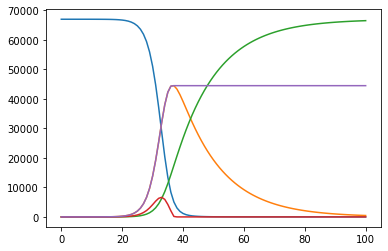

In [9]:
# Plot Model data and additional cases confirmed
df["Susceptible"].plot() # Blue
df["Infected"].plot() # Orange
df["Recovered"].plot() # Green
df["New Confirmed"].plot() # Red
df["Total Confirmed"].plot() # Purple

## with social distancing

In [10]:
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
# SOCIAL DISTANCING makes contacts per day significantly lower
b = 0.1
# Run SIR-Model and prepare further data
sir(s,i,r,S,I,R,b,k, 730)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dictf2 = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
df2 = pd.DataFrame(dictf2)
df2.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,67000.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,66999.995000,0.051429,0.003571,0.001429,0.051429
2,0.999999,0.000001,0.000000,66999.989857,0.052898,0.007245,0.001469,0.052898
3,0.999999,0.000001,0.000000,66999.984567,0.054409,0.011023,0.001511,0.054409
4,0.999999,0.000001,0.000000,66999.979126,0.055964,0.014910,0.001555,0.055964
5,0.999999,0.000001,0.000000,66999.973530,0.057563,0.018907,0.001599,0.057563
6,0.999999,0.000001,0.000000,66999.967774,0.059207,0.023019,0.001645,0.059207
7,0.999999,0.000001,0.000000,66999.961853,0.060899,0.027248,0.001692,0.060899
8,0.999999,0.000001,0.000000,66999.955763,0.062639,0.031598,0.001740,0.062639
9,0.999998,0.000001,0.000001,66999.949499,0.064429,0.036072,0.001790,0.064429


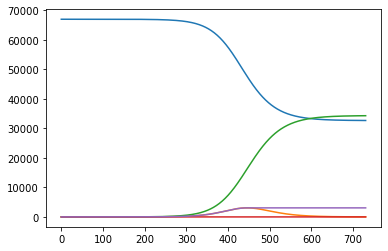

In [11]:
# Plot Model data and additional cases confirmed
df2["Susceptible"].plot() # Blue
df2["Infected"].plot() # Orange
df2["Recovered"].plot() # Green
df2["New Confirmed"].plot() # Red
df2["Total Confirmed"].plot() # Purple

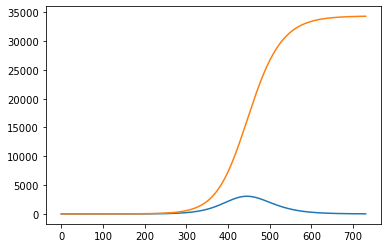

In [12]:
df2["Infected"].plot() # Blue
df2["Recovered"].plot() # Orange

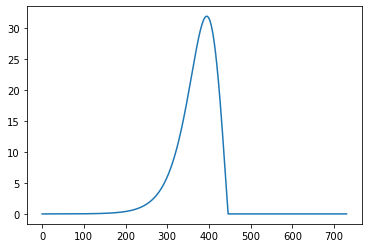

In [13]:
df2["New Confirmed"].plot()

In [14]:
df.to_csv('SIRFranceWithoutSD.csv')
df2.to_csv('SIRFranceWithSD.csv')

## Germany
### without social distancing

In [15]:
s2 = 83020000
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
n = s2 + i + r
# Lower than other countries due to culture
b = 0.4
# Run SIR-Model and prepare further data
sir(s2,i,r,S,I,R,b,k, 100)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dictg = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
dg = pd.DataFrame(dictg)
dg.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,83020.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,83019.980000,0.066429,0.003571,0.016429,0.066429
2,0.999999,0.000001,0.000000,83019.953429,0.088255,0.008316,0.021827,0.088255
3,0.999998,0.000001,0.000000,83019.918127,0.117253,0.014620,0.028998,0.117253
4,0.999998,0.000002,0.000000,83019.871225,0.155779,0.022995,0.038526,0.155779
5,0.999997,0.000002,0.000000,83019.808914,0.206963,0.034123,0.051184,0.206963
6,0.999996,0.000003,0.000001,83019.726129,0.274966,0.048906,0.068002,0.274966
7,0.999995,0.000004,0.000001,83019.616143,0.365311,0.068546,0.090345,0.365311
8,0.999993,0.000006,0.000001,83019.470019,0.485341,0.094640,0.120030,0.485341
9,0.999991,0.000008,0.000002,83019.275884,0.644809,0.129307,0.159468,0.644809


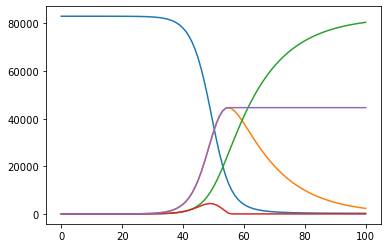

In [16]:
# Plot Model data and additional cases confirmed
dg["Susceptible"].plot() # Blue
dg["Infected"].plot() # Orange
dg["Recovered"].plot() # Green
dg["New Confirmed"].plot() # Red
dg["Total Confirmed"].plot() # Purple

## with social distancing

In [17]:
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
# SOCIAL DISTANCING
b = 0.1
# Run SIR-Model and prepare further data
sir(s2,i,r,S,I,R,b,k, 730)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dictg2 = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
dg2 = pd.DataFrame(dictg2)
dg2.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,83020.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,83019.995000,0.051429,0.003571,0.001429,0.051429
2,0.999999,0.000001,0.000000,83019.989857,0.052898,0.007245,0.001469,0.052898
3,0.999999,0.000001,0.000000,83019.984567,0.054409,0.011023,0.001511,0.054409
4,0.999999,0.000001,0.000000,83019.979126,0.055964,0.014910,0.001555,0.055964
5,0.999999,0.000001,0.000000,83019.973530,0.057563,0.018907,0.001599,0.057563
6,0.999999,0.000001,0.000000,83019.967774,0.059207,0.023019,0.001645,0.059207
7,0.999999,0.000001,0.000000,83019.961853,0.060899,0.027248,0.001692,0.060899
8,0.999999,0.000001,0.000000,83019.955763,0.062639,0.031598,0.001740,0.062639
9,0.999999,0.000001,0.000000,83019.949499,0.064429,0.036072,0.001790,0.064429


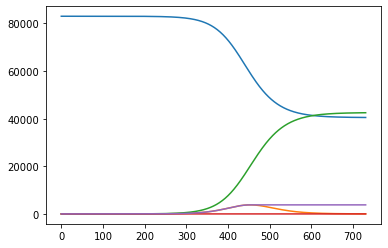

In [18]:
# Plot Model data and additional cases confirmed
dg2["Susceptible"].plot() # Blue
dg2["Infected"].plot() # Orange
dg2["Recovered"].plot() # Green
dg2["New Confirmed"].plot() # Red
dg2["Total Confirmed"].plot() # Purple

In [19]:
dg.to_csv('SIRGermanyWithoutSD.csv')
dg2.to_csv('SIRGermanyWithSD.csv')

# Spain
## without social distancing

In [20]:
s3 = 46940000
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
n = s3 + i + r
b = 0.5
# Run SIR-Model and prepare further data
sir(s3,i,r,S,I,R,b,k, 100)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dicts = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
ds = pd.DataFrame(dicts)
ds.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,46940.000000,0.050000,0.000000,0.000000,0.050000
1,0.999998,0.000002,0.000000,46939.975000,0.071429,0.003571,0.021429,0.071429
2,0.999998,0.000002,0.000000,46939.939286,0.102041,0.008673,0.030612,0.102041
3,0.999997,0.000003,0.000000,46939.888266,0.145772,0.015962,0.043732,0.145772
4,0.999995,0.000004,0.000001,46939.815380,0.208246,0.026374,0.062474,0.208246
5,0.999993,0.000006,0.000001,46939.711257,0.297494,0.041249,0.089248,0.297494
6,0.999990,0.000009,0.000001,46939.562511,0.424990,0.062499,0.127496,0.424990
7,0.999985,0.000013,0.000002,46939.350019,0.607126,0.092855,0.182136,0.607126
8,0.999979,0.000018,0.000003,46939.046460,0.867319,0.136221,0.260192,0.867319
9,0.999969,0.000026,0.000004,46938.612810,1.239017,0.198173,0.371699,1.239017


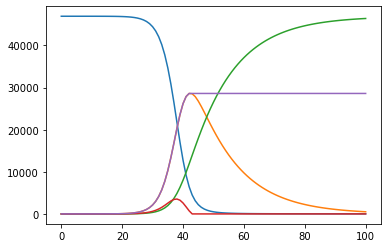

In [21]:
# Plot Model data and additional cases confirmed
ds["Susceptible"].plot() # Blue
ds["Infected"].plot() # Orange
ds["Recovered"].plot() # Green
ds["New Confirmed"].plot() # Red
ds["Total Confirmed"].plot() # Purple

## with social distancing

In [22]:
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
b = 0.1
# Run SIR-Model and prepare further data
sir(s3,i,r,S,I,R,b,k, 730)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dicts2 = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
ds2 = pd.DataFrame(dicts2)
ds2.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,46940.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,46939.995000,0.051429,0.003571,0.001429,0.051429
2,0.999999,0.000001,0.000000,46939.989857,0.052898,0.007245,0.001469,0.052898
3,0.999999,0.000001,0.000000,46939.984567,0.054409,0.011023,0.001511,0.054409
4,0.999998,0.000001,0.000000,46939.979126,0.055964,0.014910,0.001555,0.055964
5,0.999998,0.000001,0.000000,46939.973530,0.057563,0.018907,0.001599,0.057563
6,0.999998,0.000001,0.000000,46939.967774,0.059207,0.023019,0.001645,0.059207
7,0.999998,0.000001,0.000001,46939.961853,0.060899,0.027248,0.001692,0.060899
8,0.999998,0.000001,0.000001,46939.955763,0.062639,0.031598,0.001740,0.062639
9,0.999998,0.000001,0.000001,46939.949499,0.064429,0.036072,0.001790,0.064429


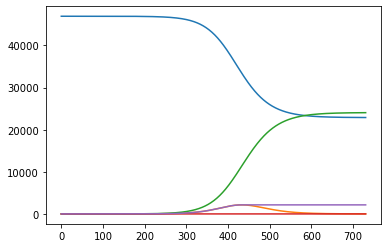

In [23]:
# Plot Model data and additional cases confirmed
ds2["Susceptible"].plot() # Blue
ds2["Infected"].plot() # Orange
ds2["Recovered"].plot() # Green
ds2["New Confirmed"].plot() # Red
ds2["Total Confirmed"].plot() # Purple

In [34]:
ds.to_csv('SIRSpainWithoutSD.csv')
ds2.to_csv('SIRSpainWithSD.csv')

# Italy
## without social distancing

In [25]:
s4 = 60360000
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
n = s4 + i + r
b = 0.7
# Run SIR-Model and prepare further data
sir(s4,i,r,S,I,R,b,k, 100)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dicti = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
di = pd.DataFrame(dicti)
di.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,60360.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,60359.965000,0.081429,0.003571,0.031429,0.081429
2,0.999998,0.000002,0.000000,60359.908000,0.132612,0.009388,0.051184,0.132612
3,0.999996,0.000004,0.000000,60359.815172,0.215968,0.018860,0.083356,0.215968
4,0.999994,0.000006,0.000001,60359.663995,0.351719,0.034286,0.135751,0.351719
5,0.999990,0.000009,0.000001,60359.417793,0.572798,0.059409,0.221079,0.572798
6,0.999983,0.000015,0.000002,60359.016839,0.932838,0.100323,0.360040,0.932838
7,0.999972,0.000025,0.000003,60358.363864,1.519182,0.166955,0.586344,1.519182
8,0.999954,0.000041,0.000005,60357.300466,2.474066,0.275467,0.954885,2.474066
9,0.999926,0.000067,0.000007,60355.568698,4.029115,0.452187,1.555049,4.029115


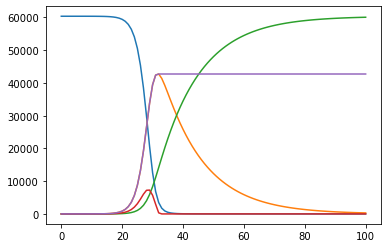

In [26]:
# Plot Model data and additional cases confirmed
di["Susceptible"].plot() # Blue
di["Infected"].plot() # Orange
di["Recovered"].plot() # Green
di["New Confirmed"].plot() # Red
di["Total Confirmed"].plot() # Purple

In [27]:
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
b = 0.1
# Run SIR-Model and prepare further data
sir(s4,i,r,S,I,R,b,k, 730)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dicti2 = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
di2 = pd.DataFrame(dicti2)
di2.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,60360.000000,0.050000,0.000000,0.000000,0.050000
1,0.999999,0.000001,0.000000,60359.995000,0.051429,0.003571,0.001429,0.051429
2,0.999999,0.000001,0.000000,60359.989857,0.052898,0.007245,0.001469,0.052898
3,0.999999,0.000001,0.000000,60359.984567,0.054409,0.011023,0.001511,0.054409
4,0.999999,0.000001,0.000000,60359.979126,0.055964,0.014910,0.001555,0.055964
5,0.999999,0.000001,0.000000,60359.973530,0.057563,0.018907,0.001599,0.057563
6,0.999999,0.000001,0.000000,60359.967774,0.059207,0.023019,0.001645,0.059207
7,0.999999,0.000001,0.000000,60359.961853,0.060899,0.027248,0.001692,0.060899
8,0.999998,0.000001,0.000001,60359.955763,0.062639,0.031598,0.001740,0.062639
9,0.999998,0.000001,0.000001,60359.949499,0.064429,0.036072,0.001790,0.064429


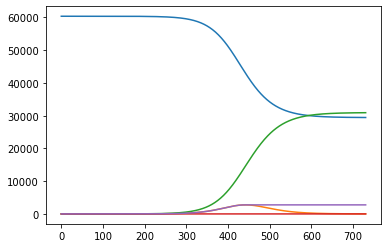

In [28]:
# Plot Model data and additional cases confirmed
di2["Susceptible"].plot() # Blue
di2["Infected"].plot() # Orange
di2["Recovered"].plot() # Green
di2["New Confirmed"].plot() # Red
di2["Total Confirmed"].plot() # Purple

In [35]:
di.to_csv('SIRItalyWithoutSD.csv')
di2.to_csv('SIRItalyWithSD.csv')

# France
## Extreme Example

In [30]:
S = []
I = []
R = []
S_abs = []
I_abs = []
R_abs = []
n = s + i + r
b = 3
# Run SIR-Model and prepare further data
sir(s,i,r,S,I,R,b,k, 11)
S_abs = makeAbsolute(S,n)
I_abs = makeAbsolute(I,n)
R_abs = makeAbsolute(R,n) 
conf = [0]
# all in thousands
confAcc = [50/1000]
addConfs(I_abs, conf, confAcc)
# Get Data ready for visualization
dictfE = {"Susceptible fr.": S, "Infected fr.": I, "Recovered fr.": R,
         "Susceptible": S_abs, "Infected": I_abs, "Recovered": R_abs,
         "New Confirmed": conf, "Total Confirmed": confAcc}
dfE = pd.DataFrame(dictfE)
dfE.head(40).round(6)

,Susceptible fr.,Infected fr.,Recovered fr.,Susceptible,Infected,Recovered,New Confirmed,Total Confirmed
0,0.999999,0.000001,0.000000,67000.000000,0.050000,0.000000,0.000000,0.050000
1,0.999997,0.000003,0.000000,66999.850000,0.196428,0.003571,0.146428,0.196428
2,0.999988,0.000012,0.000000,66999.260716,0.771681,0.017602,0.575253,0.771681
3,0.999954,0.000045,0.000001,66996.945699,3.031579,0.072722,2.259897,3.031579
4,0.999818,0.000178,0.000004,66987.851385,11.909351,0.289263,8.877773,11.909351
5,0.999285,0.000698,0.000017,66952.129836,46.780233,1.139931,34.870881,46.780233
6,0.997192,0.002741,0.000067,66811.889514,183.679110,4.481377,136.898877,183.679110
7,0.988990,0.010747,0.000263,66262.399697,720.048990,17.601313,536.369880,720.048990
8,0.957104,0.041865,0.001030,64126.035292,2804.981324,69.033384,2084.932334,2804.981324
9,0.836896,0.159084,0.004021,56072.056314,10658.604493,269.389193,7853.623169,10658.604493


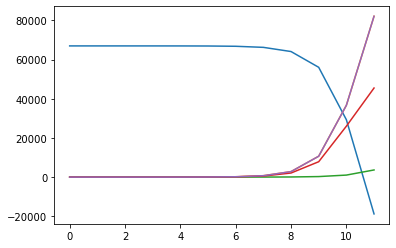

In [31]:
# Plot Model data and additional cases confirmed
dfE["Susceptible"].plot() # Blue
dfE["Infected"].plot() # Orange
dfE["Recovered"].plot() # Green
dfE["New Confirmed"].plot() # Red
dfE["Total Confirmed"].plot() # Purple

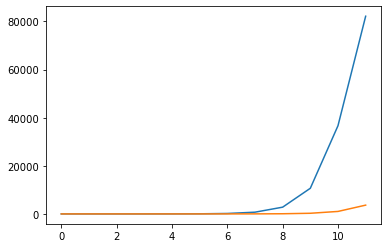

In [32]:
dfE["Infected"].plot() # Blue
dfE["Recovered"].plot() # Orange

In [33]:
dfE.to_csv('SIRFranceExtreme.csv')
dfE.to_csv('SIRFranceExtreme.csv')